In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import LinearSVC, SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.inspection import DecisionBoundaryDisplay
from drawdata import ScatterWidget

print("imports finished")

imports finished


In [22]:
widget = ScatterWidget()
widget

ScatterWidget()

In [25]:
df = widget.data_as_pandas
df

,x,y,color,label
0,57.936534,423.470799,#1f77b4,a
1,77.817445,452.936119,#1f77b4,a
2,65.486517,424.088582,#1f77b4,a
3,76.409406,408.532826,#1f77b4,a
4,117.390525,409.508410,#1f77b4,a
...,...,...,...,...
615,574.540312,133.604550,#d62728,d
616,716.962422,173.146579,#d62728,d
617,717.653269,171.202804,#d62728,d
618,700.723406,155.093638,#d62728,d


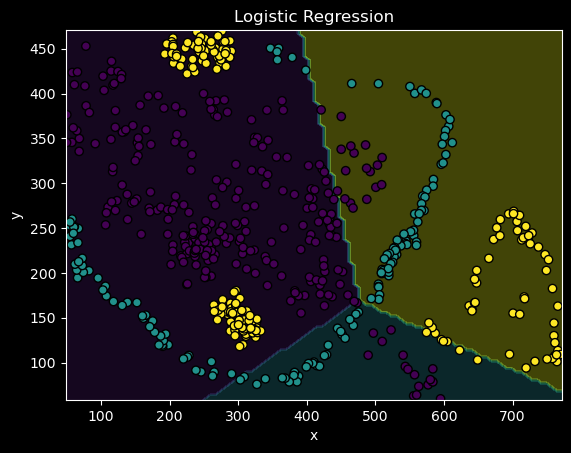

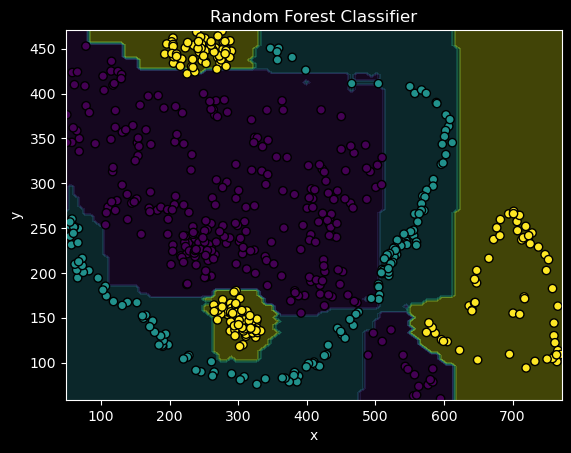

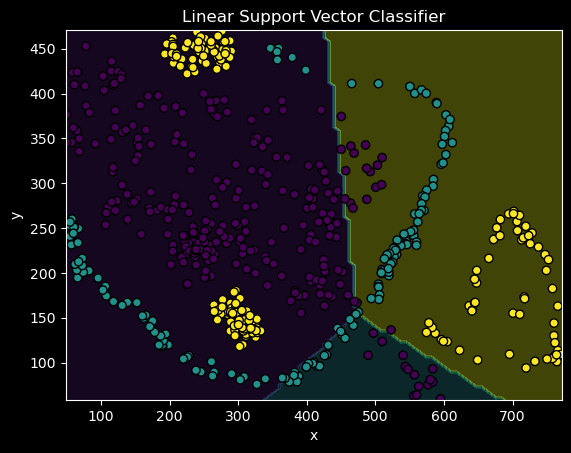

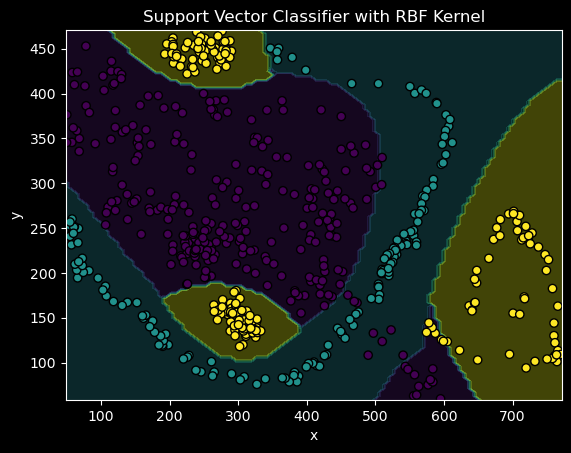

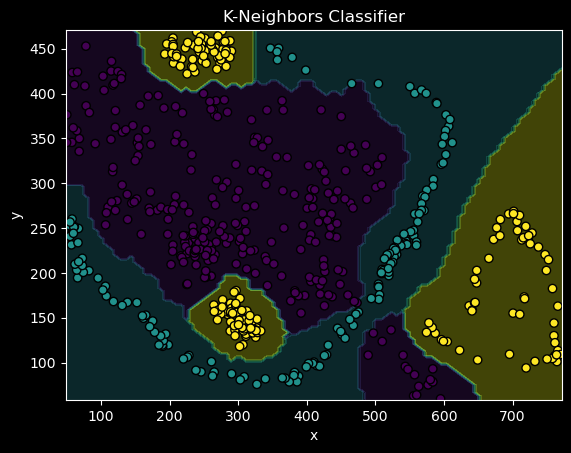

In [26]:
label_encoder = LabelEncoder()
df["label_encoded"] = label_encoder.fit_transform(df["label"])

X = df[["x", "y"]].values
y = df["label_encoded"].values

classifiers = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest Classifier": RandomForestClassifier(n_jobs=-1),
    "Linear Support Vector Classifier": LinearSVC(),
    "Support Vector Classifier with RBF Kernel": SVC(kernel="rbf"),
    "K-Neighbors Classifier": KNeighborsClassifier(),
}

for name, clf in classifiers.items():
    clf.fit(X, y)
    disp = DecisionBoundaryDisplay.from_estimator(
        clf, X, response_method="predict", xlabel="x", ylabel="y", alpha=0.3
    )

    disp.ax_.scatter(X[:, 0], X[:, 1], c=y, edgecolors="k")
    disp.ax_.set_title(name)
    plt.show()

In [ ]:
import warnings
from sklearn.exceptions import ConvergenceWarning

warnings.filterwarnings("ignore", category=ConvergenceWarning)

import ipywidgets
from sklearn.inspection import DecisionBoundaryDisplay
from IPython.display import HTML

output = ipywidgets.Output()
widget3 = ScatterWidget()

classifier_selector = ipywidgets.RadioButtons(
    options=["Logistic Regression", "Random Forest", "SVC Poly", "SVC RBF"],
    description="Classifier:",
)


@output.capture(clear_output=True)
def on_change(change):
    df = widget3.data_as_pandas
    if len(df) and (df["color"].nunique() > 1):
        X = df[["x", "y"]].values
        y = df["color"]
        display(HTML("<br><br><br>"))
        fig = plt.figure(figsize=(12, 12))

        if classifier_selector.value == "Logistic Regression":
            classifier = LogisticRegression().fit(X, y)
        elif classifier_selector.value == "SVC Poly":
            classifier = SVC(kernel="poly").fit(X, y)
        elif classifier_selector.value == "SVC RBF":
            classifier = SVC(kernel="rbf").fit(X, y)
        else:
            classifier = RandomForestClassifier().fit(X, y)

        disp = DecisionBoundaryDisplay.from_estimator(
            classifier,
            X,
            response_method="predict",
            xlabel="x",
            ylabel="y",
            alpha=0.5,
        )
        disp.ax_.scatter(X[:, 0], X[:, 1], c=y, edgecolor="k")
        plt.title(f"{classifier.__class__.__name__}")
        plt.show()


widget3.observe(on_change, names=["data"])
classifier_selector.observe(on_change, names="value")
on_change(None)

ipywidgets.HBox([ipywidgets.VBox([widget3, classifier_selector]), output])